In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.teamplayerdashboard import TeamPlayerDashboard

In [4]:
team_id = find_teams_by_full_name("Philadelphia 76ers")[0]['id']

In [15]:
team = TeamPlayerDashboard(measure_type_detailed_defense = "Base",per_mode_detailed = "Totals", team_id = mia_id, season = "2021-22").players_season_totals.get_data_frame()


In [16]:
team = team.loc[team.MIN >= 40]

In [17]:
players = team[['PLAYER_NAME','MIN','PTS']].copy().reset_index(drop = True)

In [18]:
#find player weight and points in respect to totals
players["CPl%"] = (1/len(players))*100
players["CPts%"] = (players["PTS"]/players["PTS"].sum())*100

In [19]:
#sort by ascending CPts%
players = players.sort_values(by=["CPts%"])

In [20]:
#si sale CopyWarning
#pd.options.mode.chained_assignment = None 

In [21]:
#to get cumulatives 
players["CPl%"] = players["CPl%"].cumsum()
players["CPts%"] = players["CPts%"].cumsum()
       

In [22]:
#to calculate gini coefficient of teams
top = 0
bottom = 0
gini = 0
for i in range(len(players)):
   top = top + (float(players.iloc[i]["CPl%"])-float(players.iloc[i]["CPts%"]))
   bottom = bottom + float(players.iloc[i]["CPl%"])

gini = (top/bottom) * 100
    

In [23]:
gini

32.446808510638306

In [24]:
players

,PLAYER_NAME,MIN,PTS,CPl%,CPts%
1,Charles Bassey,80.965000,29,7.692308,1.285461
8,Paul Reed,137.098333,36,15.384615,2.881206
5,Isaiah Joe,124.348333,44,23.076923,4.831560
7,Matisse Thybulle,360.908333,90,30.769231,8.820922
2,Danny Green,325.070000,109,38.461538,13.652482
0,Andre Drummond,444.211667,134,46.153846,19.592199
10,Shake Milton,405.338333,186,53.846154,27.836879
3,Furkan Korkmaz,491.435000,193,61.538462,36.391844
4,Georges Niang,524.998333,236,69.230769,46.852837
6,Joel Embiid,353.116667,251,76.923077,57.978723


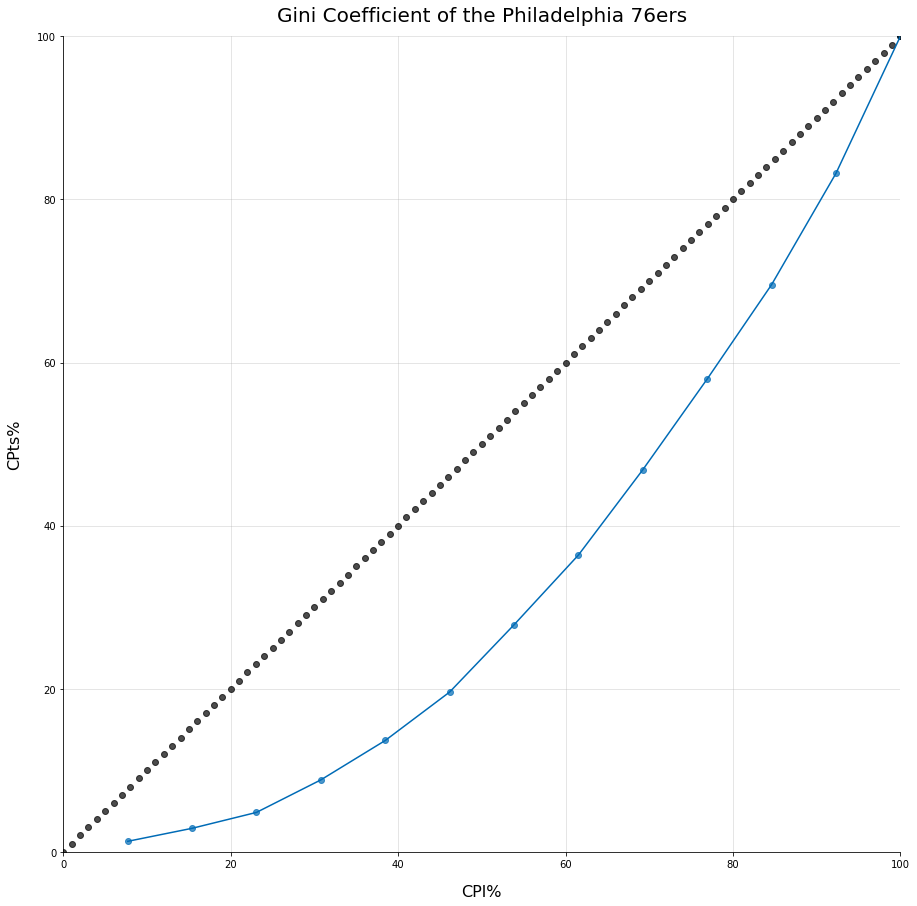

In [26]:
fig, ax = plt.subplots(figsize=(15,15))

#Create a dot for each player
#Find their team color in the COLORS dictionary
#s stands for size, the dot size is proportional to the QBs number of plays

for i in range(len(players)):
    ax.scatter(players.iloc[i]["CPl%"], players.iloc[i]["CPts%"], alpha=.7,color = '#006BB6')

i = 0
while(i <= 100):
    ax.scatter(i,i,alpha = .7, color = 'black')
    i=i+1

plt.plot(players["CPl%"], players["CPts%"],color = '#006BB6')



#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#set limits on graph
ax.set_ylim(bottom = 0, top= 100)
ax.set_xlim(left = 0, right = 100)

#Remove top and right boundary lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_title('Gini Coefficient of the Philadelphia 76ers',fontsize=20,pad=15)
ax.set_xlabel('CPl%',fontsize=16,labelpad=15)
ax.set_ylabel('CPts%',fontsize=16,labelpad=15)
plt.show()